In [1]:
import seaborn as sns
sns.set()

In [2]:
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

from sklearn.linear_model import LinearRegression
from scipy.fft import fft, rfftfreq, rfft

import prediction_functions as pf
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import pandas as pd
#import xarray as xr

from sklearn.linear_model import LinearRegression

In [3]:
#5 year window

In [4]:
#5 and #10 year windows together

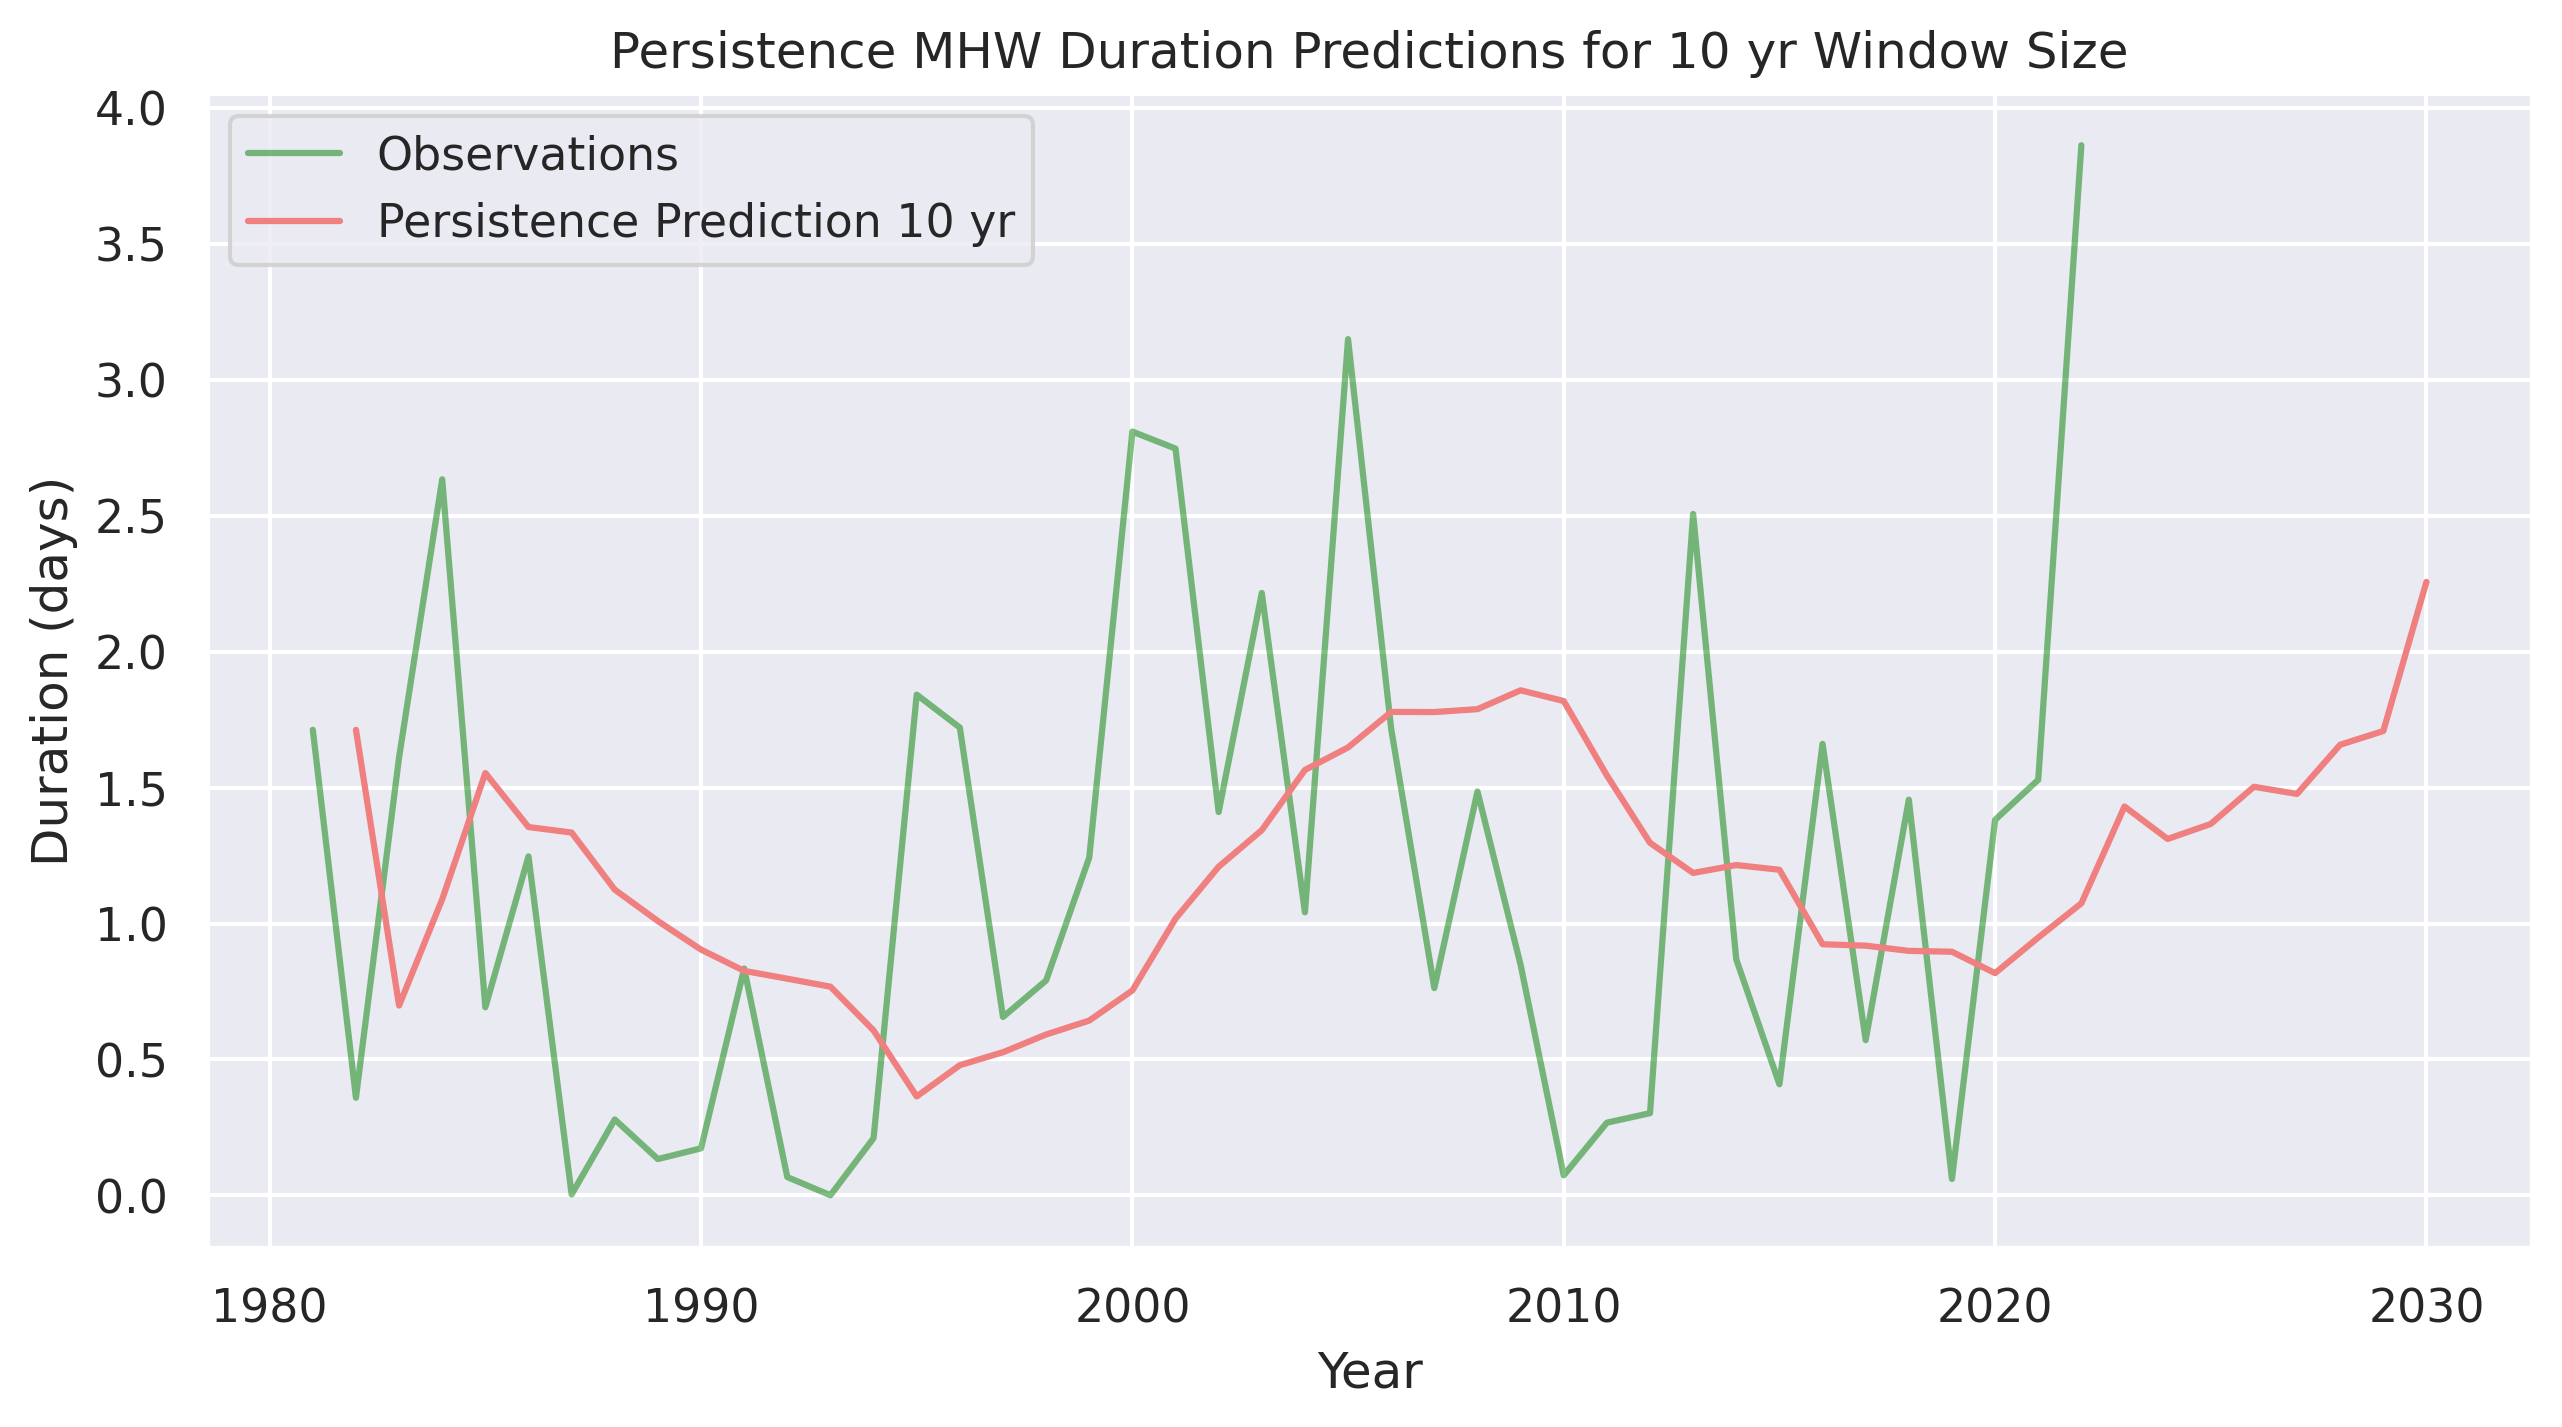

In [5]:


# Load data from NetCDF file into DataFrame using xarray
file_path_duration = 'AnnualMHWDuration_SI_Observations.nc'
ds_duration = xr.open_dataset(file_path_duration)
spatial_average_duration = ds_duration['spatial_average']
year = ds_duration['year']
observed_duration = spatial_average_duration.values.flatten()
df_duration = pd.DataFrame({'spatial_average': observed_duration, 'year': year.values.flatten()})
df_duration.set_index('year', inplace=True)
ds_duration.close()

def persistence_pred(df, start_year, end_year, window_length=10, variable="spatial_average"):
    """
    Predicts future values using persistence (average of past values) for a specified variable over a range of years within a DataFrame.

    Parameters:
    - df (DataFrame): Input DataFrame containing data with a "year" column and the specified variable.
    - start_year (int): Starting year for the analysis.
    - end_year (int): Ending year for the analysis.
    - window_length (int, optional): Length of the window used for persistence prediction. Default is 5.
    - variable (str, optional): The column name in the DataFrame representing the variable for prediction. Default is "spatial_average".

    Returns:
    - predictions (list): List of predicted values using persistence for the specified variable.
    - years (list): List of years for which predictions were made.
    """

    # Initialize empty lists to store predictions and years
    predictions = []
    years = []

    # Loop through the specified range of years for creating persistence predictions
    for year in range(start_year, end_year + 1):
        # Create a window of data within the specified range for persistence calculation
        window = df[(df.index >= year - window_length) & (df.index < year)]

        # Calculate persistence prediction (average of past values)
        pred = window[variable].mean()
        predictions.append(pred)
        years.append(year)
    
    # Return the lists of predictions and years as a tuple
    return (predictions, years)

# Example usage of the function
start_year = 1982
end_year = 2030
window_length = 10

# Perform persistence prediction
predictions, years = persistence_pred(df_duration, start_year, end_year, window_length=window_length)

# Plotting the data and persistence predictions
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(df_duration.index, df_duration['spatial_average'], label="Observations", alpha=0.5,color='green')
plt.plot(years, predictions, label=f'Persistence Prediction {window_length} yr',color='lightcoral')
plt.legend(loc="best")
plt.title("Persistence MHW Duration Predictions for 10 yr Window Size")
plt.xlabel("Year")
plt.ylabel("Duration (days)")
plt.show()


In [6]:
#5 and 10 year together

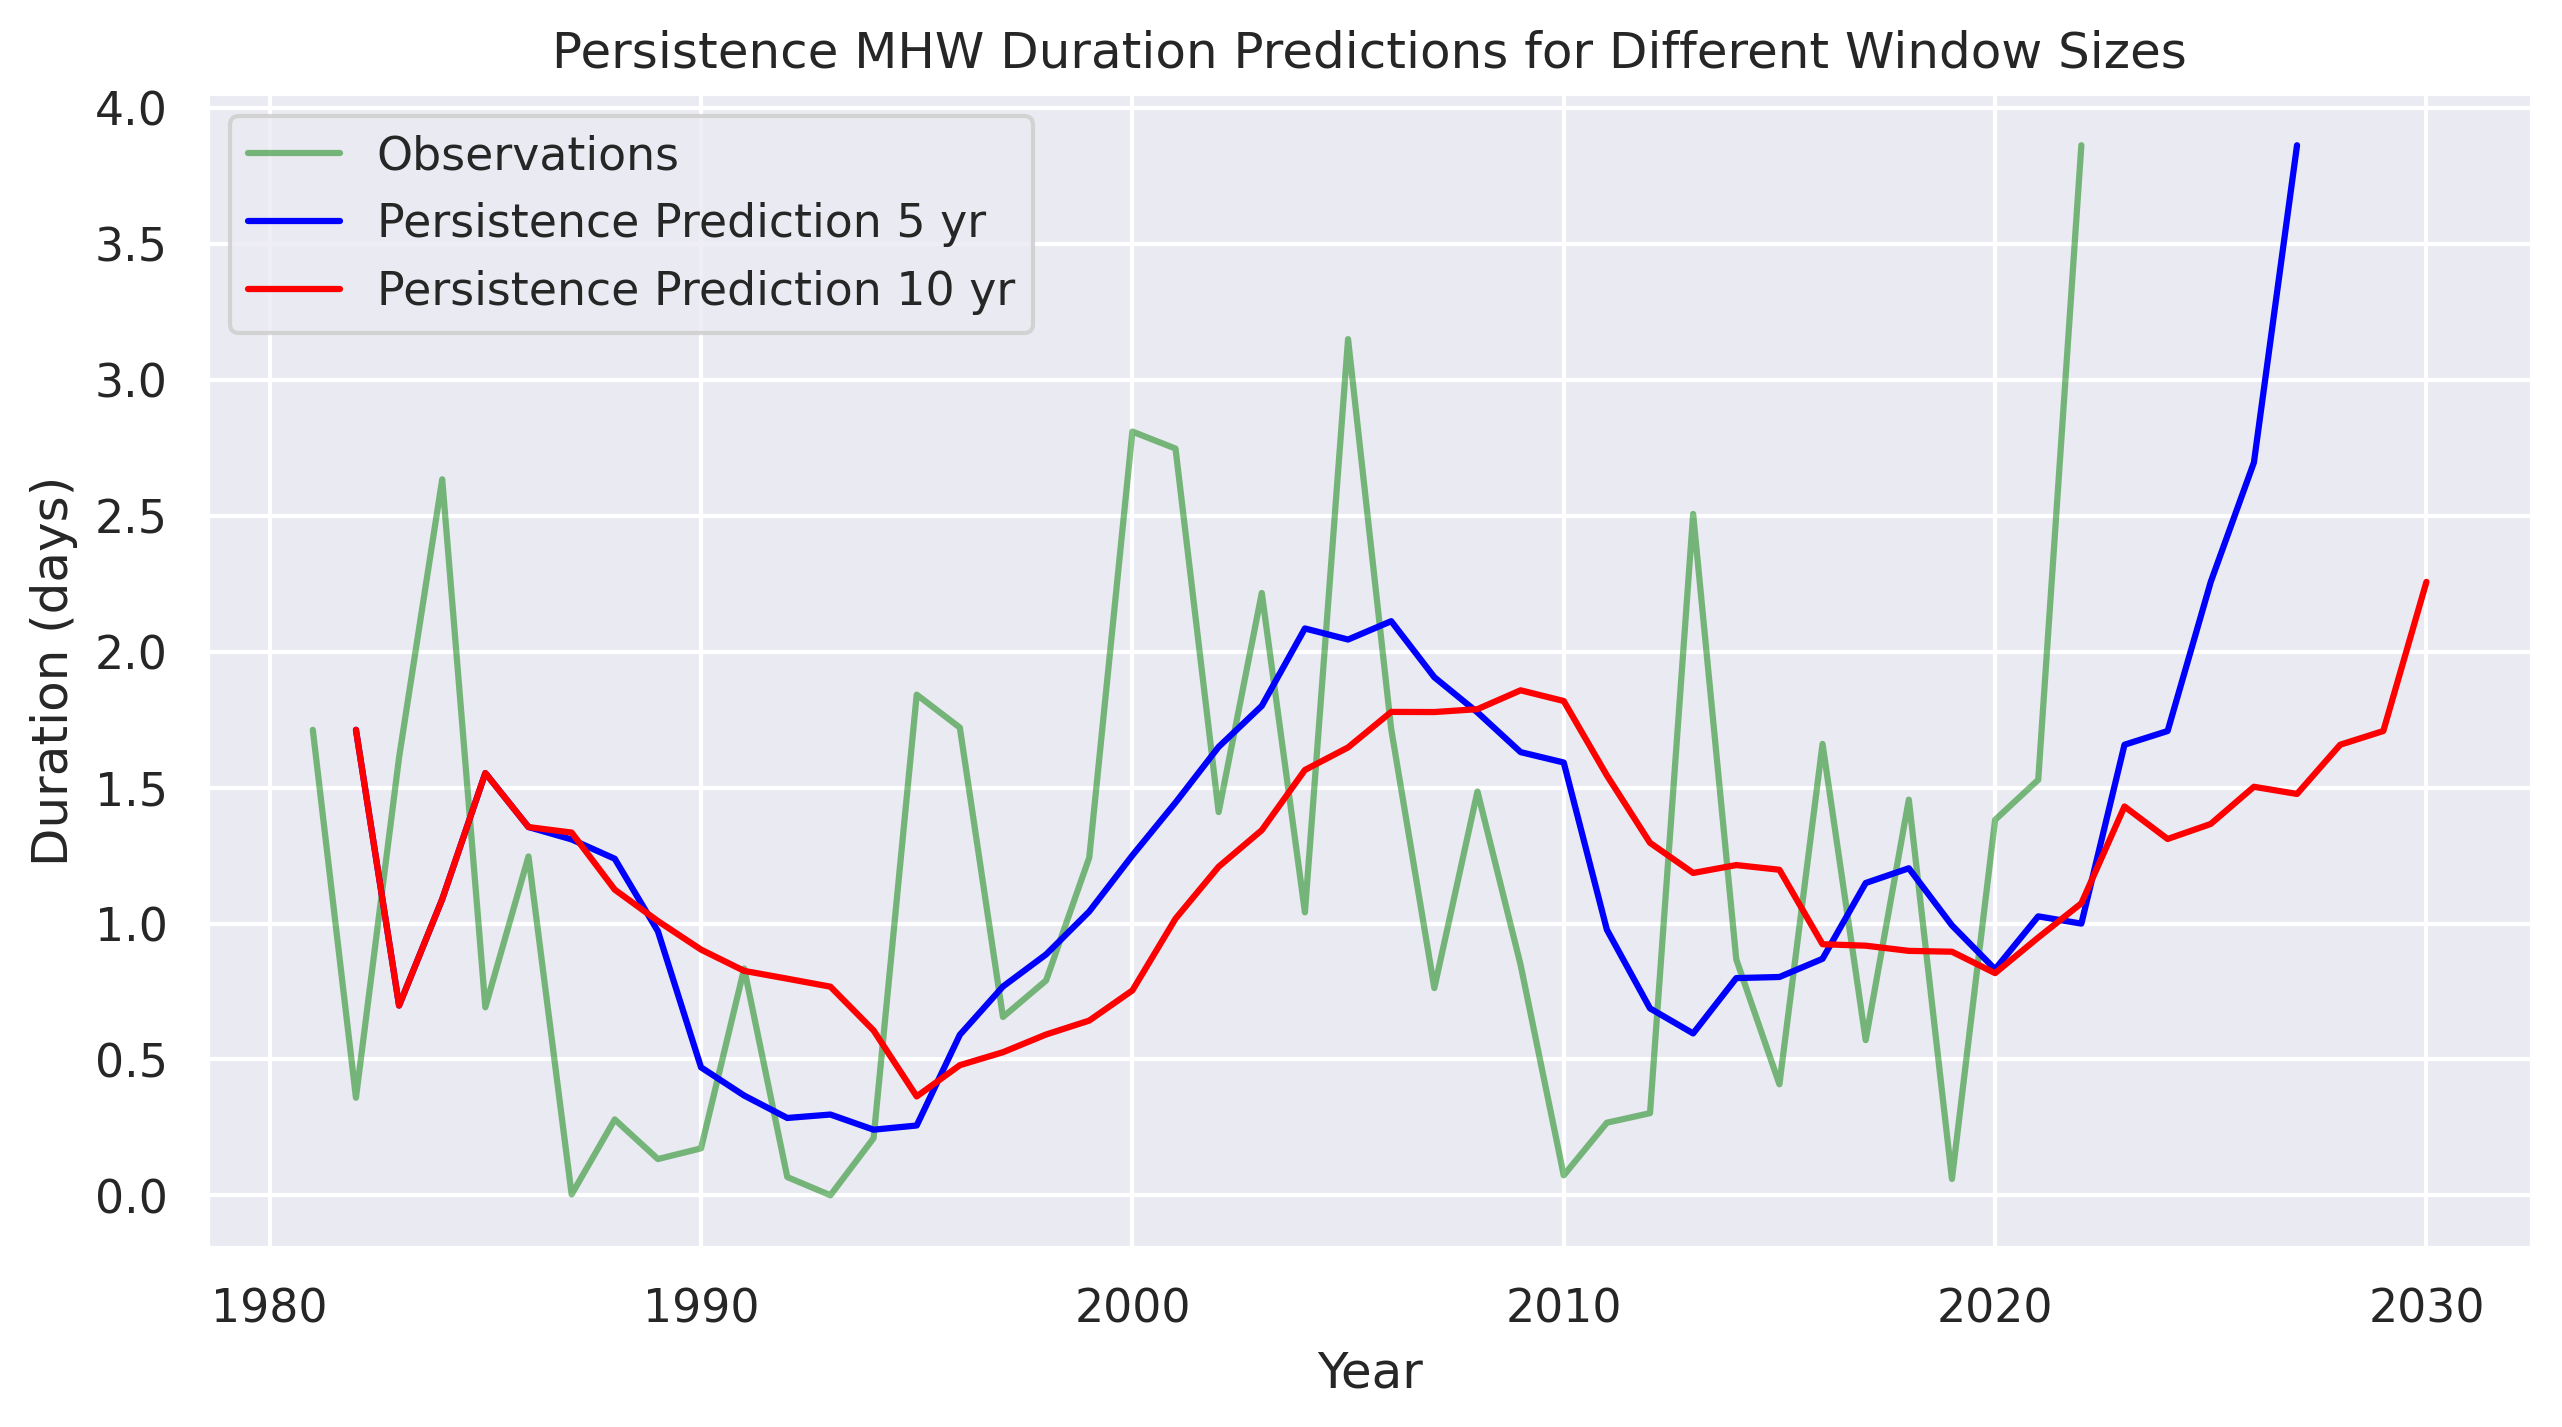

In [7]:


def persistence_pred(df, start_year, end_year, window_lengths=[5, 10], variable="spatial_average"):
    """
    Predicts future values using persistence (average of past values) for a specified variable over a range of years within a DataFrame.

    Parameters:
    - df (DataFrame): Input DataFrame containing data with a "year" column and the specified variable.
    - start_year (int): Starting year for the analysis.
    - end_year (int): Ending year for the analysis.
    - window_lengths (list of int, optional): List of window lengths used for persistence prediction. Default is [5, 10].
    - variable (str, optional): The column name in the DataFrame representing the variable for prediction. Default is "spatial_average".

    Returns:
    - predictions_dict (dict): Dictionary containing predictions for each window size.
    """

    # Initialize dictionary to store predictions for each window size
    predictions_dict = {}

    # Loop through the specified window lengths
    for window_length in window_lengths:
        # Initialize empty lists to store predictions and years
        predictions = []
        years = []

        # Loop through the specified range of years for creating persistence predictions
        for year in range(start_year, end_year + 1):
            # Create a window of data within the specified range for persistence calculation
            window = df[(df.index >= year - window_length) & (df.index < year)]

            # Calculate persistence prediction (average of past values)
            pred = window[variable].mean()
            predictions.append(pred)
            years.append(year)

        # Store predictions in the dictionary
        predictions_dict[window_length] = {'predictions': predictions, 'years': years}
    
    # Return the dictionary of predictions for each window size
    return predictions_dict

# Example usage of the function
start_year = 1982
end_year = 2030
window_lengths = [5, 10]

# Perform persistence prediction for multiple window sizes
predictions_dict = persistence_pred(df_duration, start_year, end_year, window_lengths=window_lengths)

# Plotting the data and persistence predictions for each window size
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(df_duration.index, df_duration['spatial_average'], label="Observations", alpha=0.5,color='green')

# Plot predictions for each window size with different colors
for window_length, data in predictions_dict.items():
    color = 'red' if window_length == 10 else 'blue'
    plt.plot(data['years'], data['predictions'], label=f'Persistence Prediction {window_length} yr', color=color)
    
plt.legend(loc="best")
plt.title("Persistence MHW Duration Predictions for Different Window Sizes")
plt.xlabel("Year")
plt.ylabel("Duration (days)")
plt.show()


In [8]:
#Calculating MSE and RMSE


For 5-year window size:
MSE: 0.8425634044017883
RMSE: 0.9179125254629595

For 10-year window size:
MSE: 0.7492476074538892
RMSE: 0.865590900745779



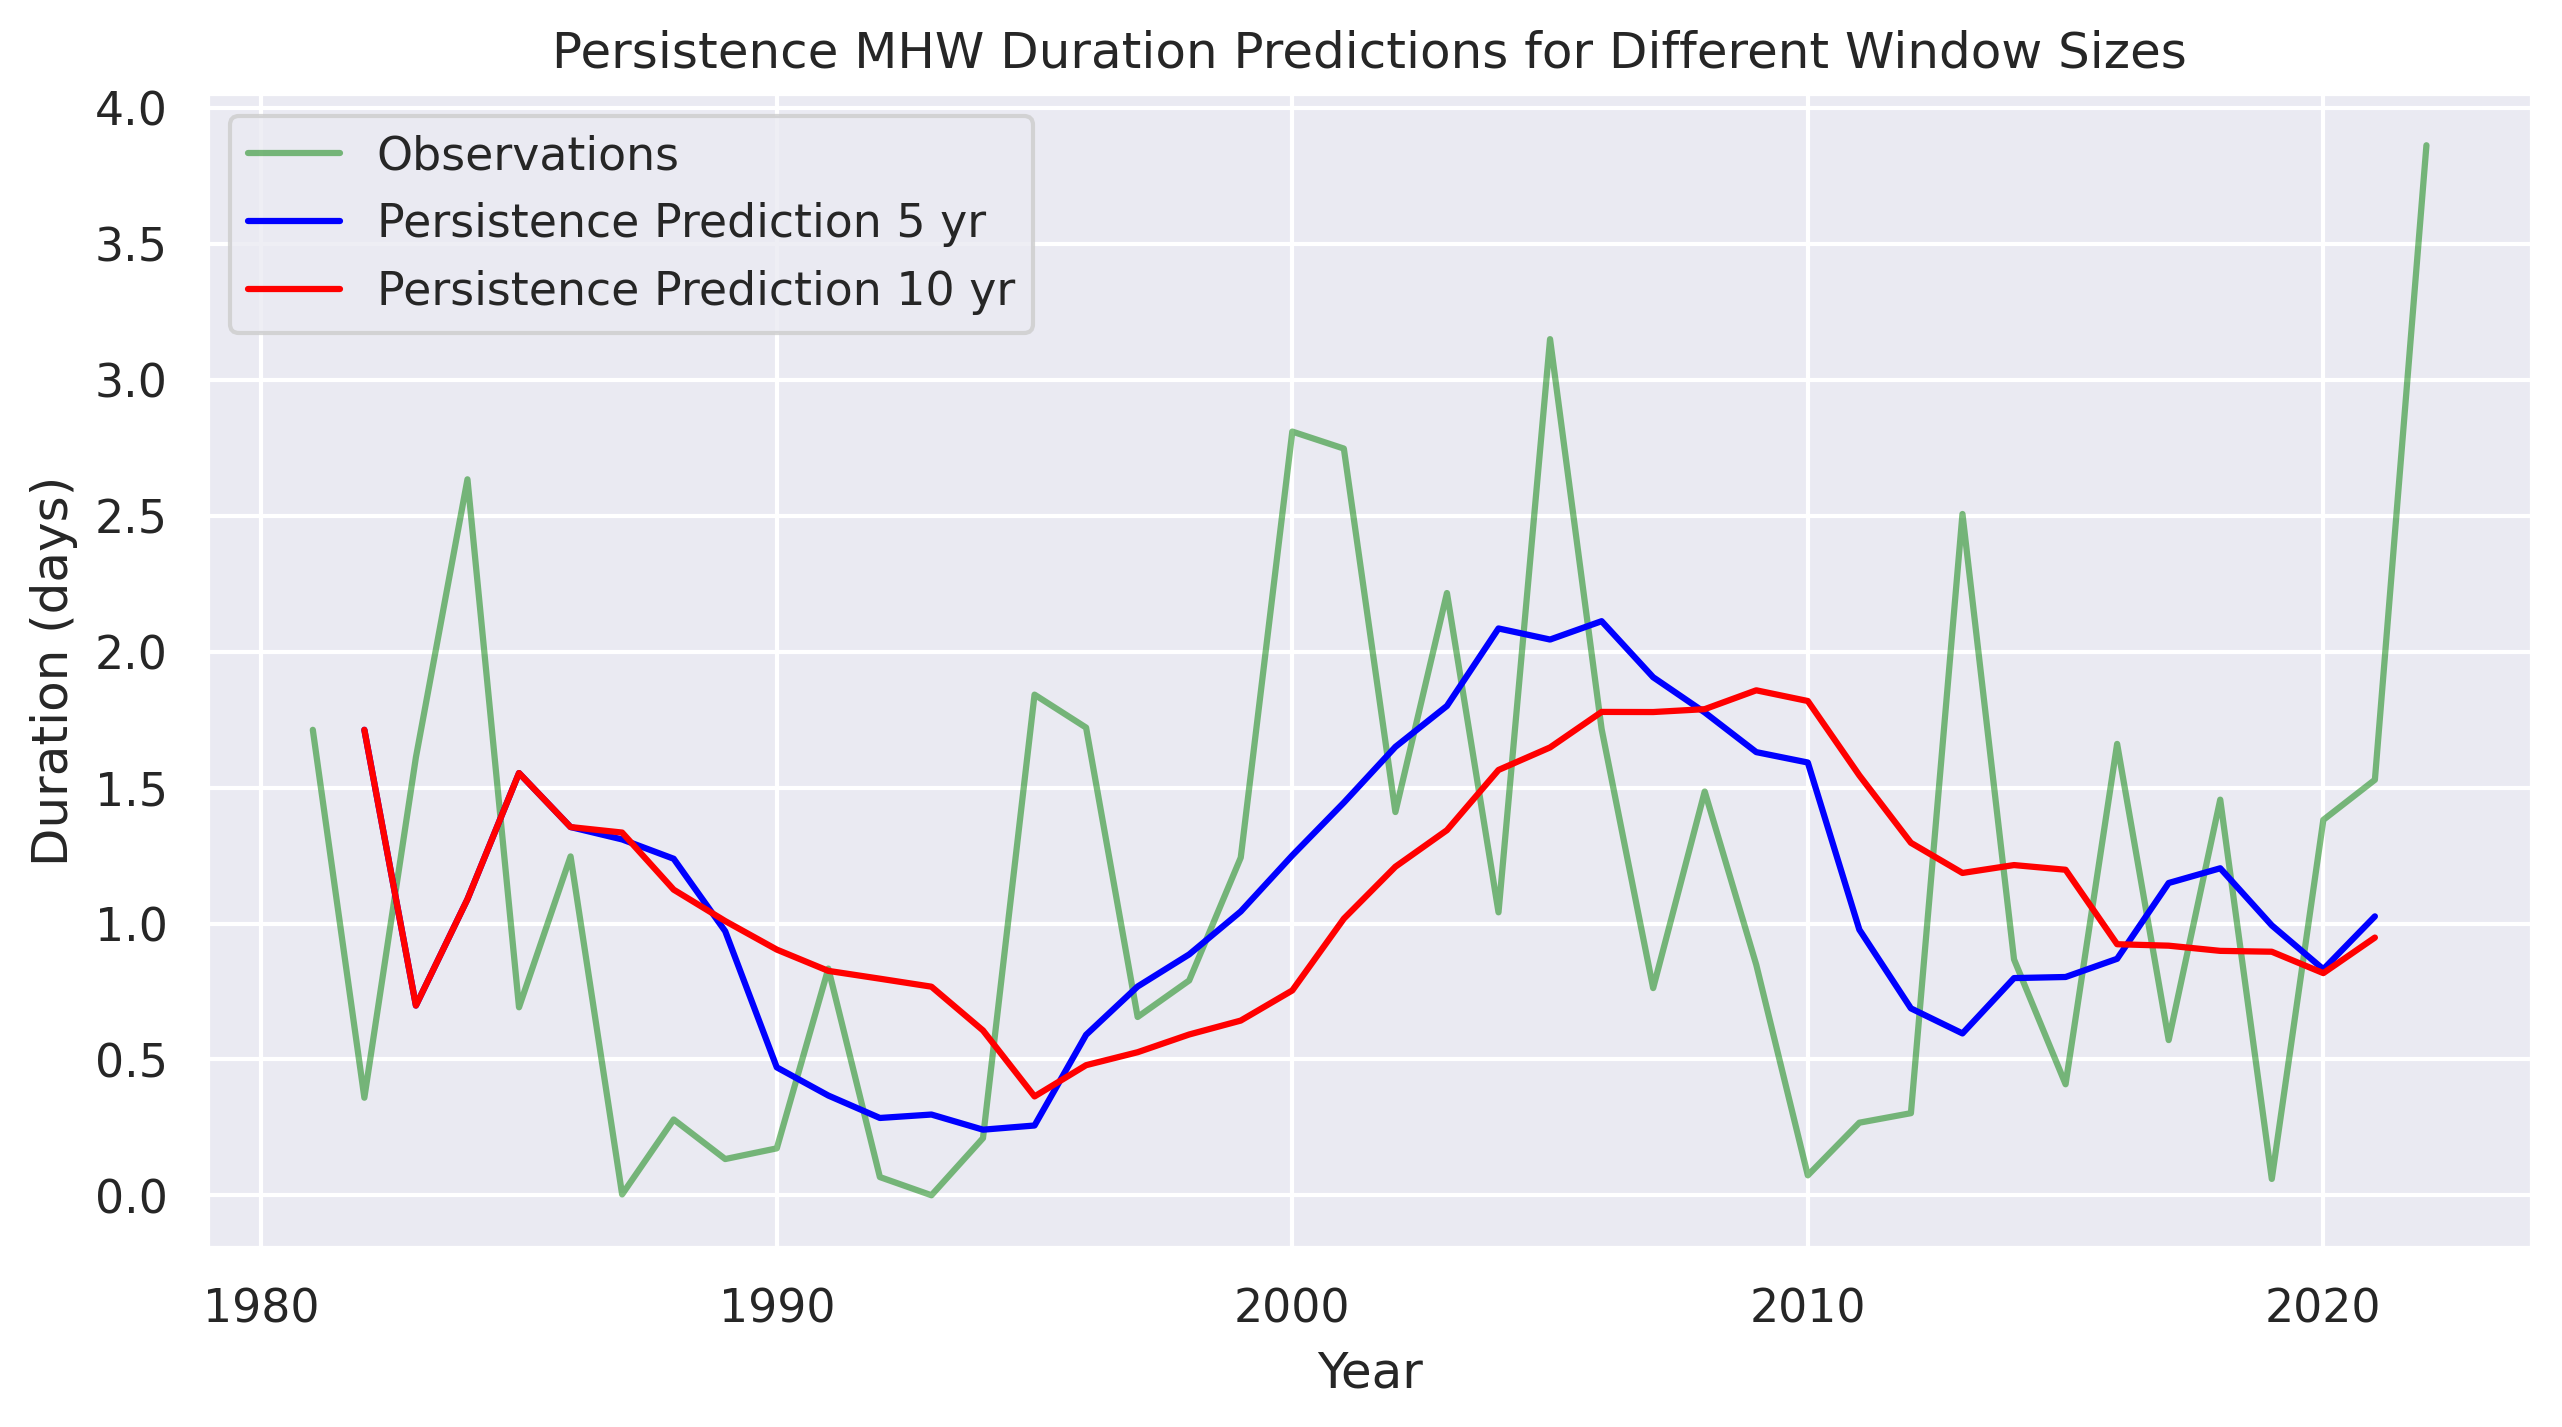

In [9]:


# Load data from NetCDF file into DataFrame using xarray
file_path_duration = 'AnnualMHWDuration_SI_Observations.nc'
ds_duration = xr.open_dataset(file_path_duration)
spatial_average_duration = ds_duration['spatial_average']
year = ds_duration['year']
observed_duration = spatial_average_duration.values.flatten()
df_duration = pd.DataFrame({'spatial_average': observed_duration, 'year': year.values.flatten()})
df_duration.set_index('year', inplace=True)
ds_duration.close()

def persistence_pred(df, start_year, end_year, window_lengths=[5, 10], variable="spatial_average"):
    """
    Predicts future values using persistence (average of past values) for a specified variable over a range of years within a DataFrame.

    Parameters:
    - df (DataFrame): Input DataFrame containing data with a "year" column and the specified variable.
    - start_year (int): Starting year for the analysis.
    - end_year (int): Ending year for the analysis.
    - window_lengths (list of int, optional): List of window lengths used for persistence prediction. Default is [5, 10].
    - variable (str, optional): The column name in the DataFrame representing the variable for prediction. Default is "spatial_average".

    Returns:
    - predictions_dict (dict): Dictionary containing predictions for each window size.
    """

    # Initialize dictionary to store predictions for each window size
    predictions_dict = {}

    # Loop through the specified window lengths
    for window_length in window_lengths:
        # Initialize empty lists to store predictions and years
        predictions = []
        years = []

        # Loop through the specified range of years for creating persistence predictions
        for year in range(start_year, end_year + 1):
            # Create a window of data within the specified range for persistence calculation
            window = df[(df.index >= year - window_length) & (df.index < year)]

            # Calculate persistence prediction (average of past values)
            pred = window[variable].mean()
            predictions.append(pred)
            years.append(year)

        # Store predictions in the dictionary
        predictions_dict[window_length] = {'predictions': predictions, 'years': years}
    
    # Return the dictionary of predictions for each window size
    return predictions_dict

import numpy as np

def calculate_errors(predictions, observed_values, years):
    """
    Calculates Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) between predictions and observations.

    Parameters:
    - predictions (array-like): Predicted values.
    - observed_values (array-like): Observed values.
    - years (array-like): Corresponding years for observations.

    Returns:
    - mse (float): Mean Squared Error.
    - rmse (float): Root Mean Squared Error.
    """
    # Truncate or interpolate observed values to match the length of predictions
    observed_values_matched = np.interp(np.arange(len(predictions)), np.arange(len(observed_values)), observed_values)

    mse = np.mean((predictions - observed_values_matched)**2)
    rmse = np.sqrt(mse)
    return mse, rmse

# Example usage of the function
start_year = 1982
end_year = 2021
window_lengths = [5, 10]

# Perform persistence prediction for multiple window sizes
predictions_dict = persistence_pred(df_duration, start_year, end_year, window_lengths=window_lengths)

# Plotting the data and persistence predictions for each window size
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(df_duration.index, df_duration['spatial_average'], label="Observations", alpha=0.5, color='green')

# Plot predictions for each window size with different colors
for window_length, data in predictions_dict.items():
    color = 'red' if window_length == 10 else 'blue'
    plt.plot(data['years'], data['predictions'], label=f'Persistence Prediction {window_length} yr', color=color)

    # Calculate and print MSE and RMSE
    observed_values = df_duration.loc[df_duration.index.isin(data['years']), 'spatial_average'].values
    years_observed = df_duration.loc[df_duration.index.isin(data['years'])].index.values
    mse, rmse = calculate_errors(data['predictions'], observed_values, years_observed)
    print(f"For {window_length}-year window size:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print("")

plt.legend(loc="best")
plt.title("Persistence MHW Duration Predictions for Different Window Sizes")
plt.xlabel("Year")
plt.ylabel("Duration (days)")
plt.show()


In [10]:
#Frequency

For 5-year window size:
MSE: 0.11622229050411943
RMSE: 0.34091390482659906

For 10-year window size:
MSE: 0.10355404208440562
RMSE: 0.3217981387211642



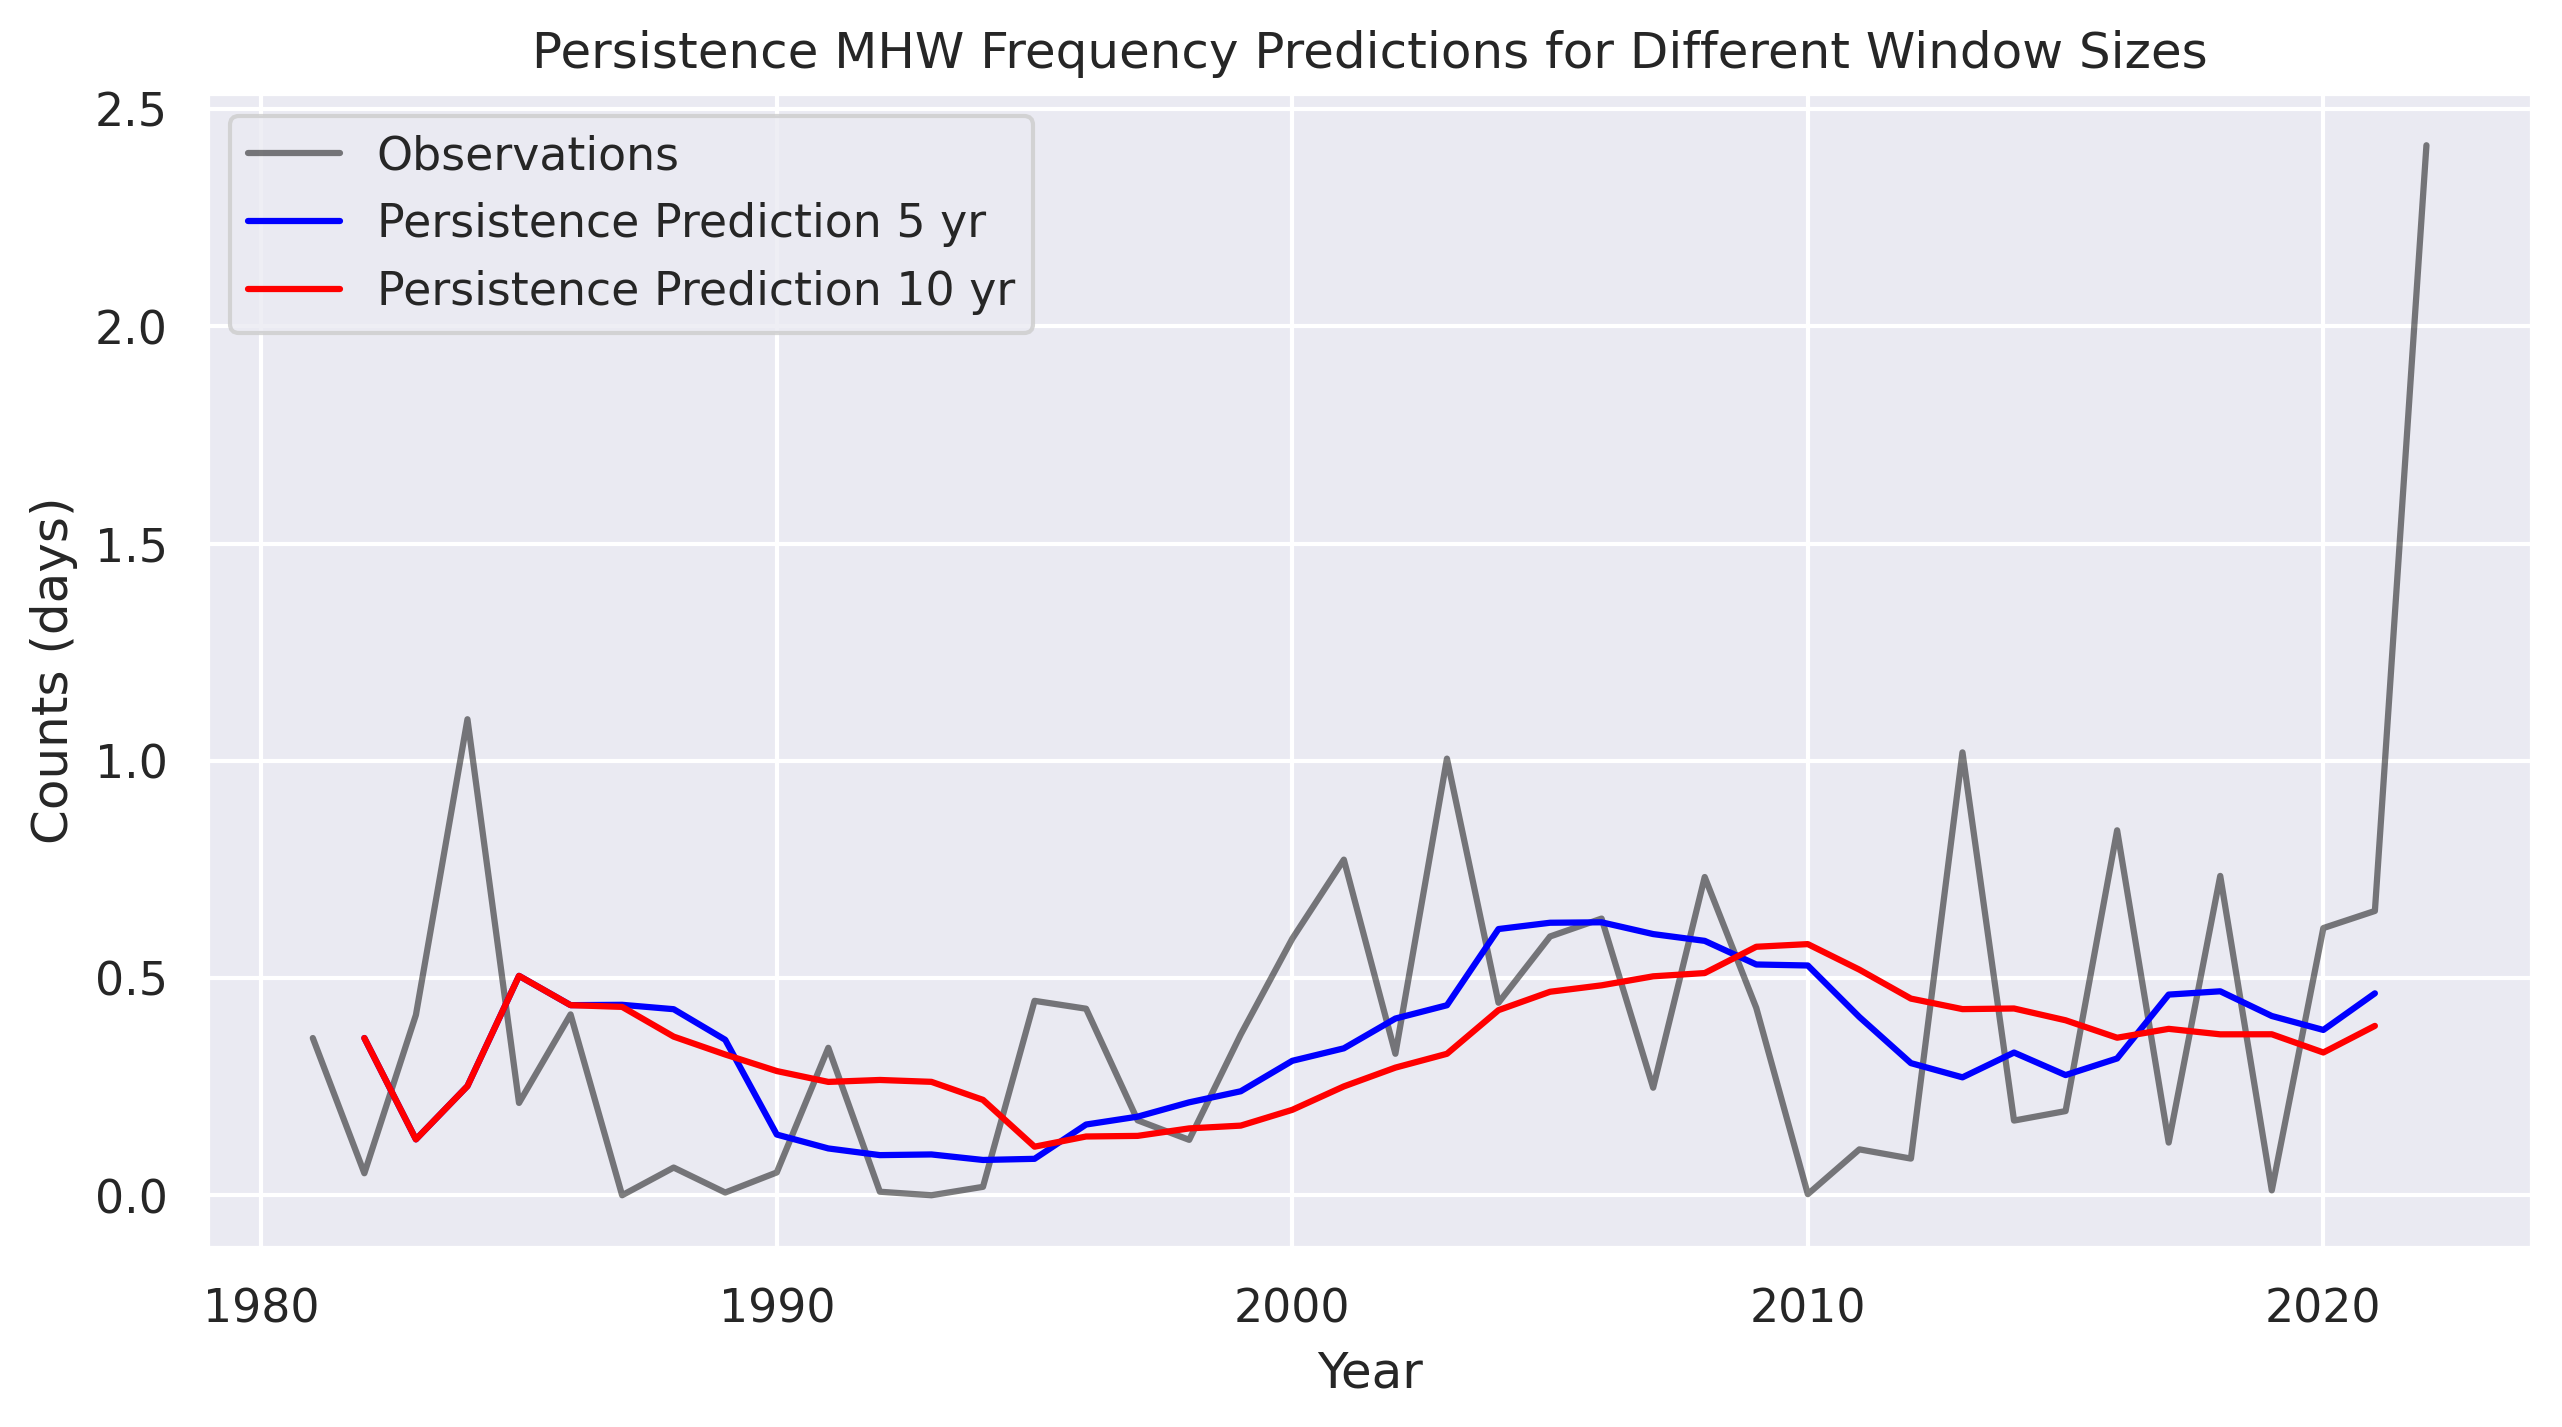

In [11]:


# Load data from NetCDF file into DataFrame using xarray
file_path_duration = 'AnnualMHWFreq_SI_Observations.nc'
ds_duration = xr.open_dataset(file_path_duration)
spatial_average_duration = ds_duration['spatial_average']
year = ds_duration['year']
observed_duration = spatial_average_duration.values.flatten()
df_duration = pd.DataFrame({'spatial_average': observed_duration, 'year': year.values.flatten()})
df_duration.set_index('year', inplace=True)
ds_duration.close()

def persistence_pred(df, start_year, end_year, window_lengths=[5, 10], variable="spatial_average"):
    """
    Predicts future values using persistence (average of past values) for a specified variable over a range of years within a DataFrame.

    Parameters:
    - df (DataFrame): Input DataFrame containing data with a "year" column and the specified variable.
    - start_year (int): Starting year for the analysis.
    - end_year (int): Ending year for the analysis.
    - window_lengths (list of int, optional): List of window lengths used for persistence prediction. Default is [5, 10].
    - variable (str, optional): The column name in the DataFrame representing the variable for prediction. Default is "spatial_average".

    Returns:
    - predictions_dict (dict): Dictionary containing predictions for each window size.
    """

    # Initialize dictionary to store predictions for each window size
    predictions_dict = {}

    # Loop through the specified window lengths
    for window_length in window_lengths:
        # Initialize empty lists to store predictions and years
        predictions = []
        years = []

        # Loop through the specified range of years for creating persistence predictions
        for year in range(start_year, end_year + 1):
            # Create a window of data within the specified range for persistence calculation
            window = df[(df.index >= year - window_length) & (df.index < year)]

            # Calculate persistence prediction (average of past values)
            pred = window[variable].mean()
            predictions.append(pred)
            years.append(year)

        # Store predictions in the dictionary
        predictions_dict[window_length] = {'predictions': predictions, 'years': years}
    
    # Return the dictionary of predictions for each window size
    return predictions_dict

import numpy as np

def calculate_errors(predictions, observed_values, years):
    """
    Calculates Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) between predictions and observations.

    Parameters:
    - predictions (array-like): Predicted values.
    - observed_values (array-like): Observed values.
    - years (array-like): Corresponding years for observations.

    Returns:
    - mse (float): Mean Squared Error.
    - rmse (float): Root Mean Squared Error.
    """
    # Truncate or interpolate observed values to match the length of predictions
    observed_values_matched = np.interp(np.arange(len(predictions)), np.arange(len(observed_values)), observed_values)

    mse = np.mean((predictions - observed_values_matched)**2)
    rmse = np.sqrt(mse)
    return mse, rmse

# Example usage of the function
start_year = 1982
end_year = 2021
window_lengths = [5, 10]

# Perform persistence prediction for multiple window sizes
predictions_dict = persistence_pred(df_duration, start_year, end_year, window_lengths=window_lengths)

# Plotting the data and persistence predictions for each window size
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(df_duration.index, df_duration['spatial_average'], label="Observations", alpha=0.5, color='black')

# Plot predictions for each window size with different colors
for window_length, data in predictions_dict.items():
    color = 'red' if window_length == 10 else 'blue'
    plt.plot(data['years'], data['predictions'], label=f'Persistence Prediction {window_length} yr', color=color)

    # Calculate and print MSE and RMSE
    observed_values = df_duration.loc[df_duration.index.isin(data['years']), 'spatial_average'].values
    years_observed = df_duration.loc[df_duration.index.isin(data['years'])].index.values
    mse, rmse = calculate_errors(data['predictions'], observed_values, years_observed)
    print(f"For {window_length}-year window size:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print("")

plt.legend(loc="best")
plt.title("Persistence MHW Frequency Predictions for Different Window Sizes")
plt.xlabel("Year")
plt.ylabel("Counts (days)")
plt.show()


In [12]:
#Only the plots

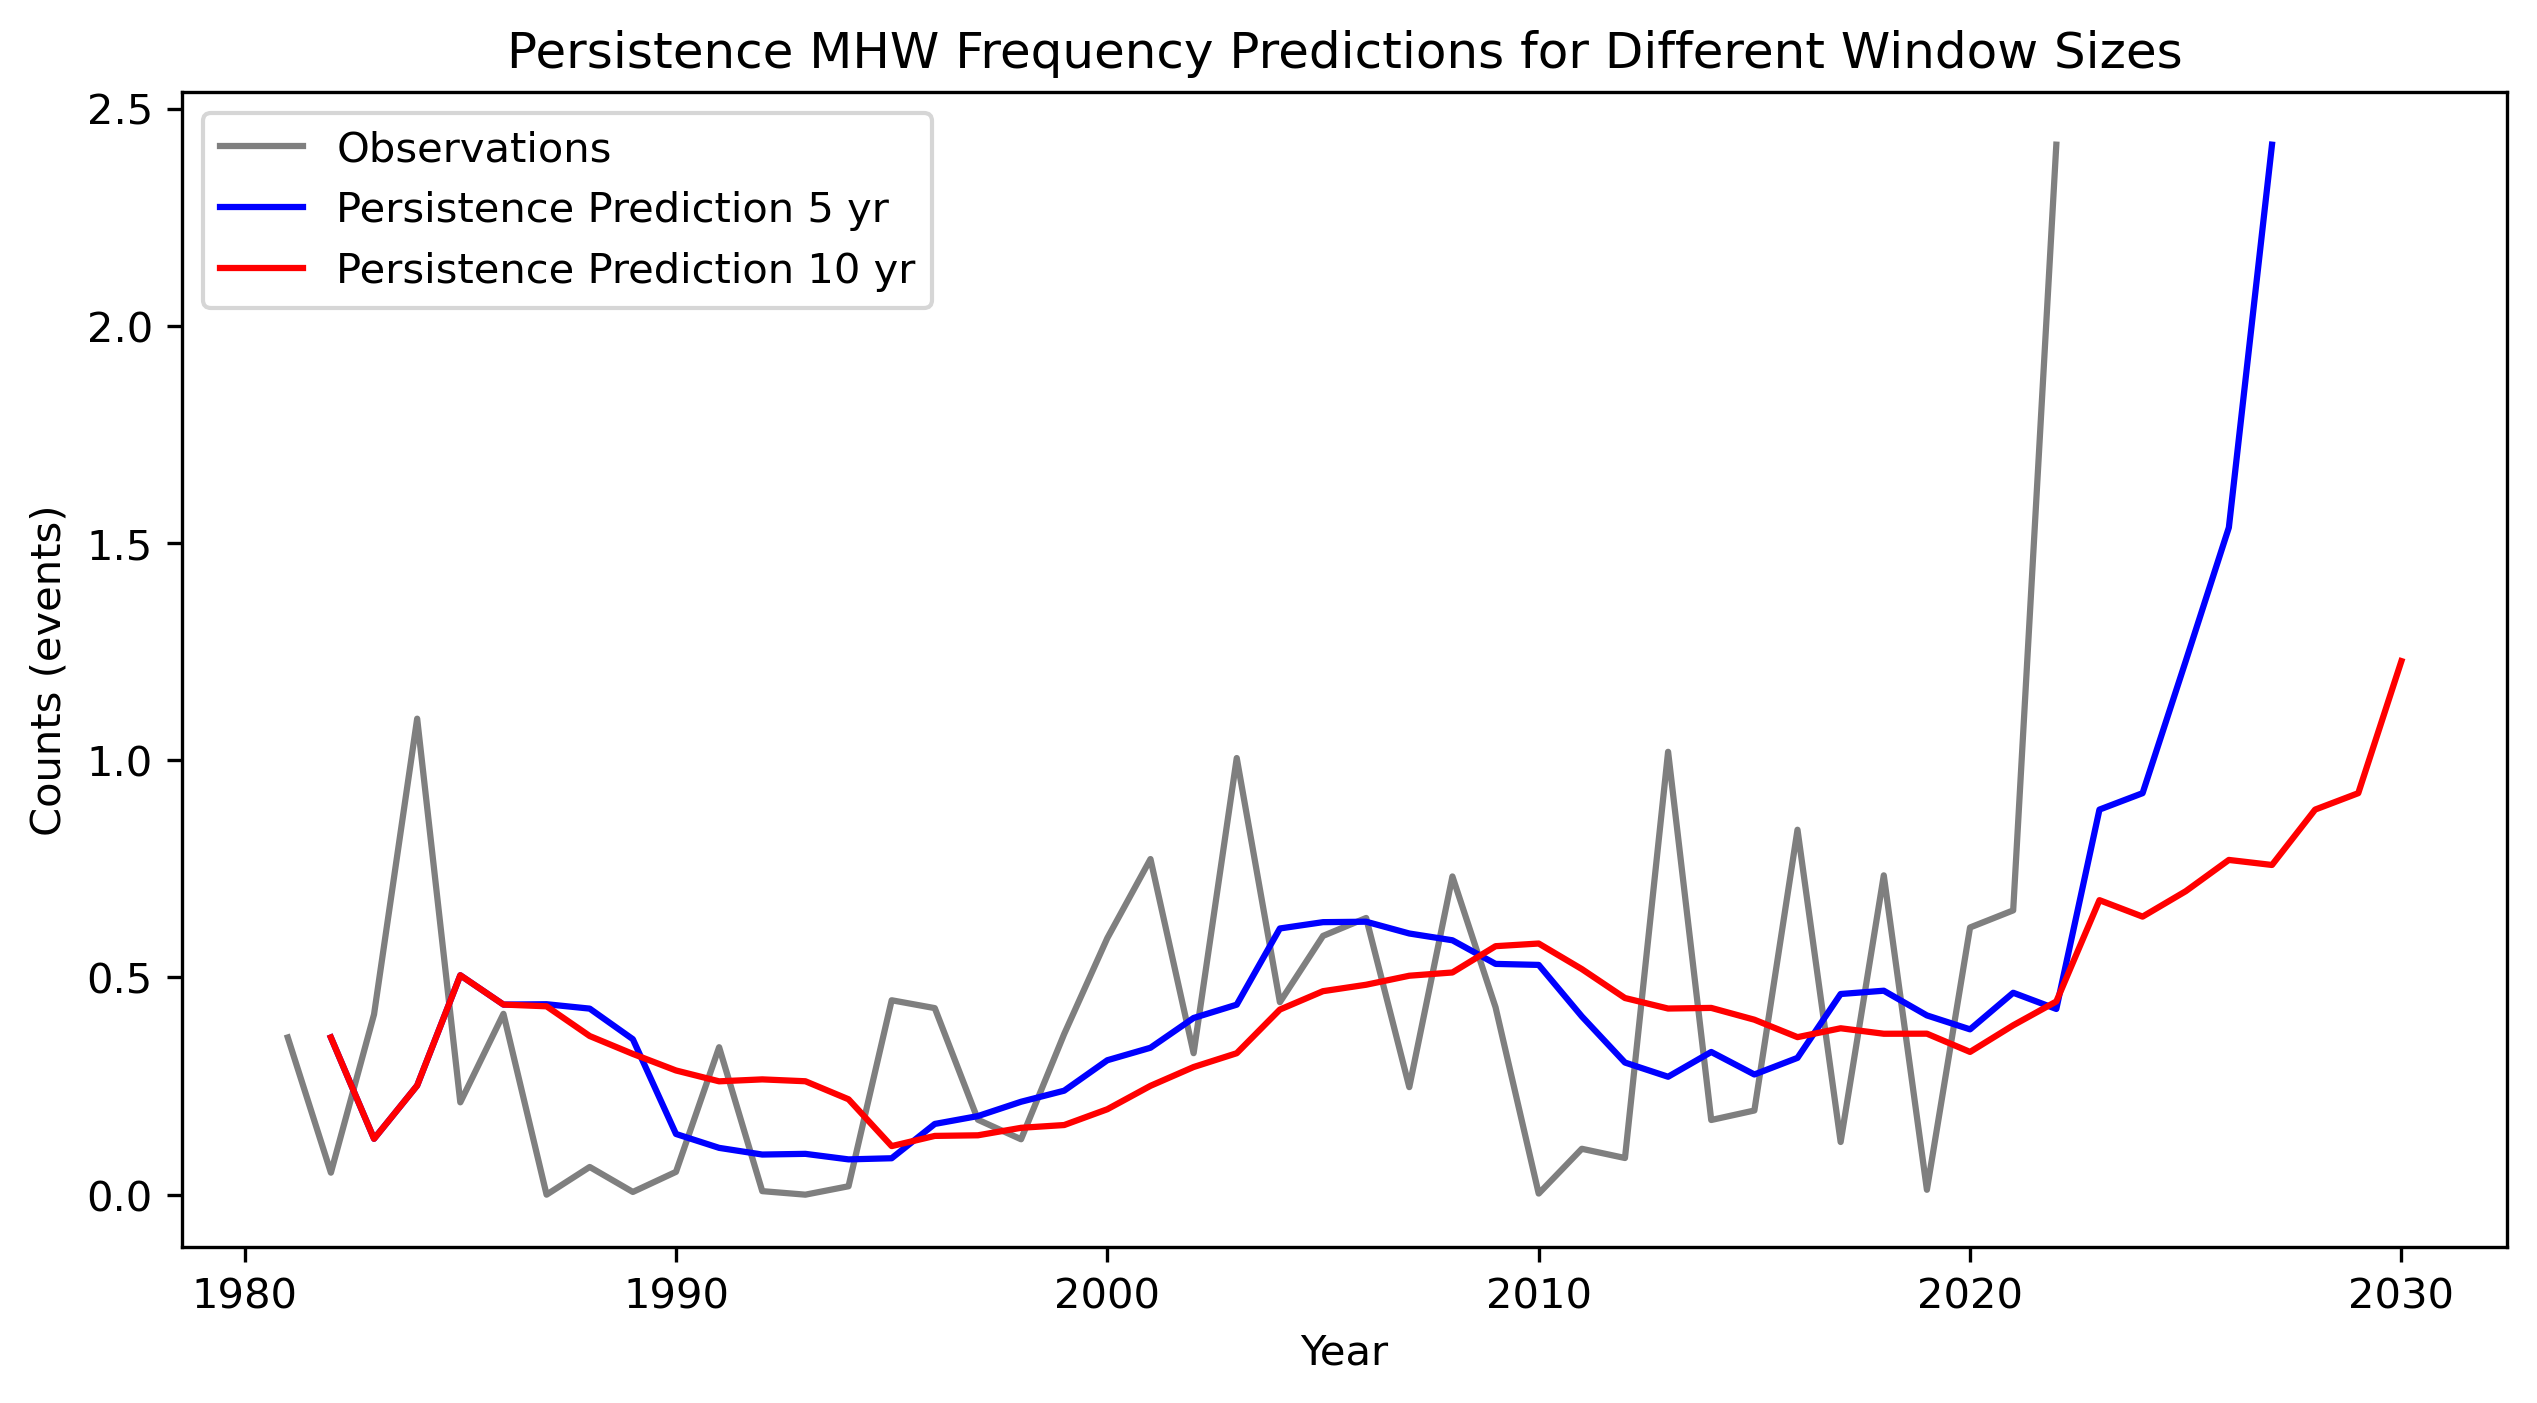

In [1]:


# Load data from NetCDF file into DataFrame using xarray
file_path_duration = 'AnnualMHWFreq_SI_Observations.nc'
ds_duration = xr.open_dataset(file_path_duration)
spatial_average_duration = ds_duration['spatial_average']
year = ds_duration['year']
observed_duration = spatial_average_duration.values.flatten()
df_duration = pd.DataFrame({'spatial_average': observed_duration, 'year': year.values.flatten()})
df_duration.set_index('year', inplace=True)
ds_duration.close()

def persistence_pred(df, start_year, end_year, window_lengths=[5, 10], variable="spatial_average"):
    """
    Predicts future values using persistence (average of past values) for a specified variable over a range of years within a DataFrame.

    Parameters:
    - df (DataFrame): Input DataFrame containing data with a "year" column and the specified variable.
    - start_year (int): Starting year for the analysis.
    - end_year (int): Ending year for the analysis.
    - window_lengths (list of int, optional): List of window lengths used for persistence prediction. Default is [5, 10].
    - variable (str, optional): The column name in the DataFrame representing the variable for prediction. Default is "spatial_average".

    Returns:
    - predictions_dict (dict): Dictionary containing predictions for each window size.
    """

    # Initialize dictionary to store predictions for each window size
    predictions_dict = {}

    # Loop through the specified window lengths
    for window_length in window_lengths:
        # Initialize empty lists to store predictions and years
        predictions = []
        years = []

        # Loop through the specified range of years for creating persistence predictions
        for year in range(start_year, end_year + 1):
            # Create a window of data within the specified range for persistence calculation
            window = df[(df.index >= year - window_length) & (df.index < year)]

            # Calculate persistence prediction (average of past values)
            pred = window[variable].mean()
            predictions.append(pred)
            years.append(year)

        # Store predictions in the dictionary
        predictions_dict[window_length] = {'predictions': predictions, 'years': years}
    
    # Return the dictionary of predictions for each window size
    return predictions_dict


# Example usage of the function
start_year = 1982
end_year = 2030
window_lengths = [5, 10]

# Perform persistence prediction for multiple window sizes
predictions_dict = persistence_pred(df_duration, start_year, end_year, window_lengths=window_lengths)

# Plotting the data and persistence predictions for each window size
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(df_duration.index, df_duration['spatial_average'], label="Observations", alpha=0.5, color='black')

# Plot predictions for each window size with different colors
for window_length, data in predictions_dict.items():
    color = 'red' if window_length == 10 else 'blue'
    plt.plot(data['years'], data['predictions'], label=f'Persistence Prediction {window_length} yr', color=color)

plt.legend(loc="best")
plt.title("Persistence MHW Frequency Predictions for Different Window Sizes")
plt.xlabel("Year")
plt.ylabel("Counts (events)")
plt.show()


In [2]:
##How does persistence model improve skill/affect skill?